In [20]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [56]:
data = pd.read_excel("https://github.com/ardy04/mtrid2/blob/main/data/cap_data.xlsx?raw=true")

In [57]:
data["Order_Date"] = pd.to_datetime(data["Order_Date"])

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
Order_ID                    3000 non-null object
Size                        3000 non-null int64
Color                       3000 non-null object
Order                       3000 non-null object
Detail_Divan                3000 non-null object
Buyer_ID                    3000 non-null int64
Order_Date                  3000 non-null datetime64[ns]
Finish_Date                 3000 non-null datetime64[ns]
Shipment_Date               3000 non-null datetime64[ns]
order_detail/information    3000 non-null object
Price                       3000 non-null int64
dtypes: datetime64[ns](3), int64(3), object(5)
memory usage: 257.9+ KB


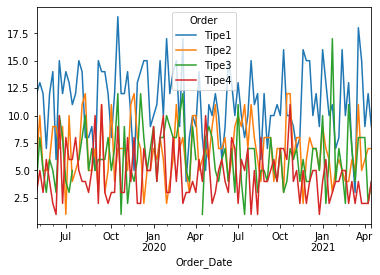

In [59]:
data2 = data.copy()
data2["Order_Date"] = data.Order_Date.dt.to_period('W').dt.to_timestamp()
data2.groupby(["Order_Date", "Order"]).size().unstack("Order").plot.line(legend = True)

In [60]:
fixed_date = pd.Series(pd.to_datetime("2020-11-12")).dt.to_period("W").dt.to_timestamp()
for_plot = data2[data2.Order_Date.isin(fixed_date)].groupby("Order").size()
for_plot

Order
Tipe1    7
Tipe2    8
Tipe3    7
Tipe4    5
dtype: int64

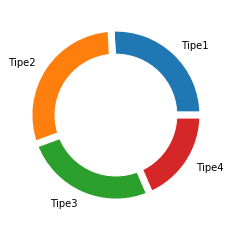

In [61]:
# create data
names = for_plot.reset_index().iloc[:, 0]
size = for_plot.reset_index().iloc[:, 1]
 
# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.7, color='white')

# Give color names
plt.pie(size, labels=names, wedgeprops = {'linewidth' : 7, 'edgecolor' : 'white' })
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

# Show the graph
plt.show()

In [35]:
size

0    13
1     6
2     6
3     7
Name: 0, dtype: int64

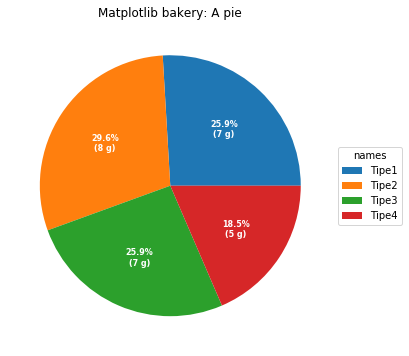

In [62]:
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(aspect="equal"))

def func(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d} Unit)".format(pct, absolute)


wedges, texts, autotexts = ax.pie(size, autopct=lambda pct: func(pct, size),
                                  textprops=dict(color="w"))

ax.legend(wedges, names,
          title="names",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Matplotlib bakery: A pie")

plt.show()

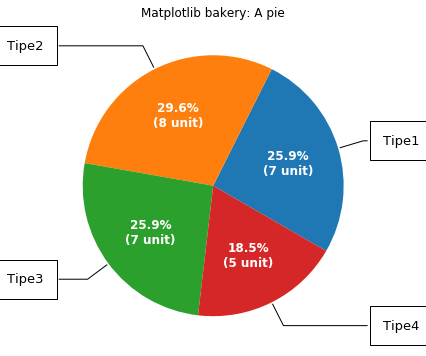

In [79]:
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(aspect="equal"))

def func(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d} unit)".format(pct, absolute)


wedges, texts, autotexts = ax.pie(size, autopct=lambda pct: func(pct, size),
                                  textprops=dict(color="w"), startangle=-30)

bbox_props = dict(boxstyle="square,pad=1", fc="w", ec="k", lw=1)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta1 - p.theta2)/2 + p.theta2
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(names[i], xy=(x, y), xytext=(1.3*np.sign(x), 1.2*y),
                horizontalalignment=horizontalalignment, fontsize = 13, **kw)

plt.setp(autotexts, size=12, weight="bold")

ax.set_title("Matplotlib bakery: A pie")

plt.show()

In [ ]:
data3 = data.copy()

In [65]:
input_date_week = "2020-12-01"
fixed_date2 = pd.Series(pd.to_datetime(input_date_week)).dt.to_period("W").dt.to_timestamp()
line_plot = data[data.Order_Date.dt.to_period('W').dt.to_timestamp().isin(fixed_date2)]

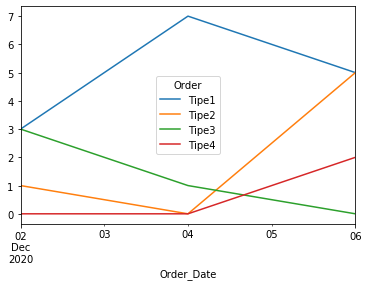

In [66]:
line_plot.groupby(["Order_Date", "Order"]).size().unstack().fillna(0).plot(legend = True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023CC3FE95C8>,
      dtype=object)

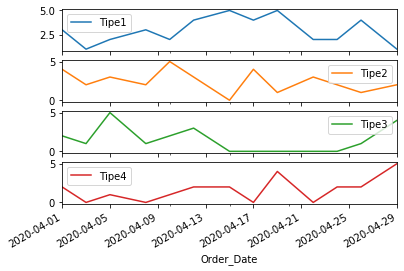

In [75]:
input_date_month = "2020-04-01"
fixed_date_month = pd.Series(pd.to_datetime(input_date_month)).dt.to_period("M").dt.to_timestamp()
line_plot_month = data[data.Order_Date.dt.to_period('M').dt.to_timestamp().isin(fixed_date_month)]
line_plot_month.groupby(["Order_Date", "Order"]).size().unstack().fillna(0).plot(legend = True, subplots = True)

In [77]:
data.describe()

,Size,Buyer_ID,Price
count,3000.000000,3000.000000,3.000000e+03
mean,152.600000,3.117667,1.069600e+06
std,20.579468,1.737093,2.920004e+05
min,120.000000,1.000000,7.000000e+05
25%,140.000000,2.000000,7.000000e+05
50%,160.000000,3.000000,1.100000e+06
75%,160.000000,4.000000,1.300000e+06
max,180.000000,7.000000,1.900000e+06
